In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [26]:
data = pd.read_csv('data/daily-minimum-temperatures-in-me.csv', header=0, skipfooter=2)
print('Daily minimum temperatures in Melbourne, Australia, 1981-1990')
data.columns = ['date', 'min_temp']
data.index = pd.to_datetime(data.date)
data.drop('date', axis=1, inplace=True)
data.head()

Daily minimum temperatures in Melbourne, Australia, 1981-1990


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,min_temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


type: <class 'numpy.float64'>


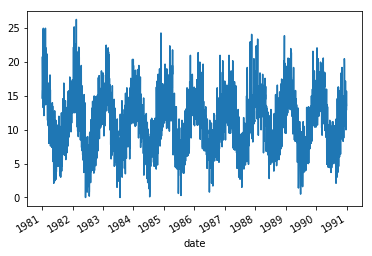

In [27]:
series = data['min_temp']
series = series.str.replace('?','')
series = pd.to_numeric(series)
print('type: {}'.format(type(series[0])))
series.plot()

## autocorrelation:

Correlation [-1, 1] describes the strength of the relatioship between to variables. 

If we assume each variable is distributed as a Gaussian, we can use Pearson's Correlation. 

In a time series we can compare each observation with previous observations, called __lags__. 

A plot of the autocorrelation of a time series by lag is called the Auto Correlation Function (__ACF__)



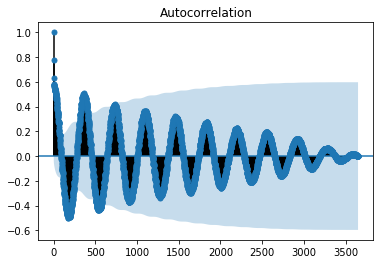

In [29]:
from statsmodels.graphics.tsaplots import plot_acf 

plot_acf(series)
plt.show()

# 95% confidence interval is the cone 
# this plot shows all 3500+ lags, so is very hard to interpret 

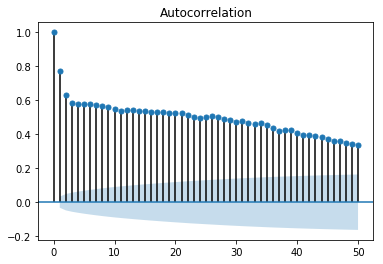

In [32]:
# plot of first 50 lags 
plot_acf(series, lags=50)
plt.show()

### partial autocorrelation

_The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags._

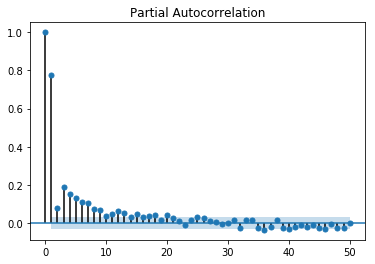

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf 

plot_pacf(series, lags=50)
plt.show()